# KNN Classification

In [24]:
#importing ML libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [9]:
df=pd.read_csv("telecust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df.custcat.value_counts() #number of total target values for each 

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x04CF9290>]],
      dtype=object)

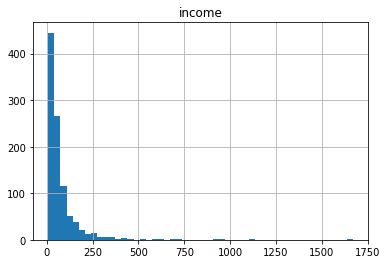

In [4]:
 df.hist("income",bins=50)

In [10]:
#independent features
x=df[["region","tenure","age","marital","address","income","ed","employ","retire","gender","reside"]].values
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [7]:
y=df.custcat.values #target feature
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [13]:
#Normalizing data
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [23]:
#splitting dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(800, 11) (800,)
(200, 11) (200,)


In [66]:
#for classiification start training
k=4
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [61]:
#now predicting test set
y_hat=neigh.predict(x_test)
print(y_hat[0:10])#predicted result
print(y_test[0:10])#actual result

[1 1 3 2 4 3 3 2 2 4]
[4 1 1 2 4 4 3 1 3 4]


In [67]:
print(neigh.predict([[3,17,55,0,32,100,5,5,0,5,5]]))#prediction of unknown value

[3]


In [63]:
from sklearn import metrics
print(metrics.accuracy_score(y_train,neigh.predict(x_train)))#accuarcy score
print(metrics.accuracy_score(y_test,y_hat))#accuracy score

0.5475
0.32


In [79]:
#calculating accuracy for different Ks
Ks=10
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfusionMx=[]
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print(mean_acc)

[0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34 ]


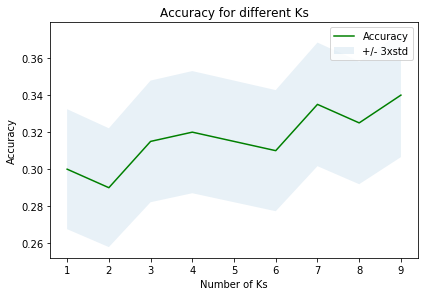

In [93]:
#visualinzing model accuracy for different Ks
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.legend(('Accuracy',"+/- 3xstd"))
plt.xlabel("Number of Ks")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.title("Accuracy for different Ks")
plt.show()